<a href="https://colab.research.google.com/github/paolagaro/Python_final_project/blob/main/Copy_of_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Factors of sales and price of houses in USA**
The main purpose of this analysis is to be able to know what are the main factors that affect the purchase, sale and prices of a home in the United States based on the data we have with information on home sales from the year 2003 to the year 2022.

In order to get ideas about what could be the factors that affect the buying and selling of houses, I will look for the year in which sales were highest and going from there, then find going from there, then find what were the variables that made the increase in purchases possible.

In [ ]:
import pandas as pd
df = pd.read_csv('US_House_Price.csv')


# Cleaning Process
To perform cleaning process I start identifying if my data set had been cleaned previously.

**Identify Missing Values** to identify if my dataset have any missing value I used the code '`df.isnull().sum()`',Which show zero missing values ​​for each column. but I still want to make sure, so I run the code '`df.dropna(inplace=True)'` to remove rows with any missing values. Next I **Identify Duplicates** Using the code `'df.drop.duplicated.sum()'`in order to obtain the sum of the duplicate values ​​in the dataset and the result was zero.

Identifing missing value and duplicates I understood that my dataset was possibly cleaned before, so I ran the codes to get general information about my dataset to make sure it was ready to manipulate.


In [ ]:
df.isnull().sum()

,0
DATE,0
building_permits,0
const_price_index,0
delinquency_rate,0
GDP,0
house_for_sale_or_sold,0
housing_subsidies,0
income,0
interest_rate,0
mortgage_rate,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index,Year
0,2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461,2003
1,2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355,2003
2,2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148,2003
3,2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884,2003
4,2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735,2003


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    240 non-null    datetime64[ns]
 1   building_permits        240 non-null    int64         
 2   const_price_index       240 non-null    float64       
 3   delinquency_rate        240 non-null    float64       
 4   GDP                     240 non-null    float64       
 5   house_for_sale_or_sold  240 non-null    int64         
 6   housing_subsidies       240 non-null    float64       
 7   income                  240 non-null    float64       
 8   interest_rate           240 non-null    float64       
 9   mortgage_rate           240 non-null    float64       
 10  construction_unit       240 non-null    int64         
 11  total_houses            240 non-null    float64       
 12  total_const_spending    240 non-null    float64   

# Descriptive Statistic
Perform **descriptive statistic** on my dataset to get a statistical summary of the data and be able to know what could be the possible factors or variable that affect the Price and selling houses in the United States.


**Descriptive statistics** help me to know which are the main factors ​​where I have to focus my analysis in order to obtain more precise results and be able to make the necessary correlations to support my insights. Seeing the results of the statistical summary I can focus the rest of my analysis on the following factors: Price, unemployment rate, income, interest and mortgage, housing_subsidies.

In [ ]:
df.describe()

,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,1309.350000,212.851467,4.876750,18095.159938,55.550000,34.677450,13493.480833,1.301625,4.683308,1201.716667,121344.45000,0.324583,6.012083,81.261200,180.657817
std,479.881055,44.566715,3.305235,2002.293963,25.383865,6.006483,1837.485256,1.578512,1.110667,423.857641,6113.86894,1.950373,2.034118,1.055429,41.255706
min,513.000000,144.400000,1.410000,14614.141000,20.000000,25.930000,10674.000000,0.050000,2.684000,520.000000,111278.00000,-5.900000,3.500000,79.583000,128.461000
25%,979.000000,184.275000,2.087500,16547.088000,36.000000,29.785000,12115.575000,0.120000,3.801375,839.000000,116590.00000,-0.800000,4.575000,80.395750,148.123000
50%,1285.500000,207.450000,3.525000,17576.126000,49.000000,33.544500,12999.350000,0.400000,4.456750,1181.500000,121771.50000,0.800000,5.400000,81.209000,172.496500
75%,1685.000000,224.525000,7.830000,19716.162500,71.000000,37.877250,14820.075000,2.000000,5.752500,1440.000000,126564.50000,1.600000,7.350000,82.107500,197.462000
max,2263.000000,353.015000,11.480000,21989.981000,127.000000,48.021000,20422.600000,5.260000,6.900000,2245.000000,131202.00000,5.000000,14.700000,83.084000,304.755000


In [ ]:
df.shape

(240, 17)

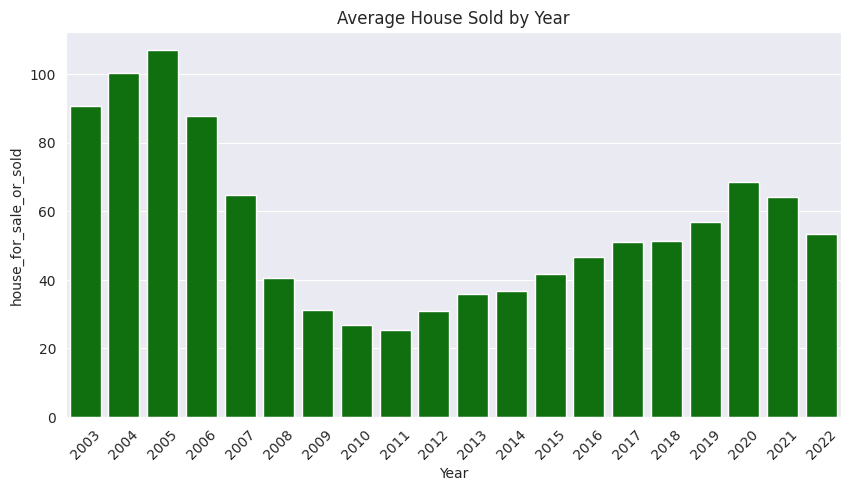

In [ ]:
df['Year'] = pd.to_datetime(df['DATE']).dt.year

Average_year = df.groupby('Year').agg({'house_for_sale_or_sold': 'mean'})
Average_year = Average_year.sort_values(by=['house_for_sale_or_sold'], ascending=False)
Average_year

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x=Average_year.index, y='house_for_sale_or_sold', data=Average_year , color='green')
plt.xlabel('Year')
plt.ylabel('house_for_sale_or_sold')
plt.title('Average House Sold by Year')
plt.xticks(rotation=45)
plt.show()

# Years With More House Purchases and Sales.
Based on the previous graph, the years in which the purchase and sale of a house was greater were: 2005, 2004 and 2003. Now we are going to look for the factors that we mentioned above that we are going to focus on our analysis(Price, unemployment rate, income, interest and mortgage, housing_subsidies. ) and observe their data between the years 2003 to 2005 to to be able to know if there is any correlation between these factors.

In [ ]:
df['Year'] = pd.to_datetime(df['DATE']).dt.year

possible_factors = ['income','home_price_index', 'unemployment_rate', 'interest_rate', 'mortgage_rate']
average_per_year = df[df['Year'].isin([2003, 2004, 2005])].groupby('Year')[possible_factors].mean()
average_per_year = average_per_year.sort_values(by='home_price_index', ascending=False)

average_per_year

,income,home_price_index,unemployment_rate,interest_rate,mortgage_rate
Year,,,,,
2005,11364.858333,171.737000,5.083333,3.213333,5.864875
2004,11233.175000,150.440250,5.541667,1.349167,5.838500
2003,10884.391667,133.731333,5.991667,1.127500,5.819542


Here you can see that during the years 2003, 2004 and 2005, when there was a greater number of home purchases and sales, the factor that remained with few variations was the mortgage rate, which maintained an average of between 5.81 and 5.8,

Although the prices of the houses and the interest rate increase while the mortgage rate remains stable there will be a flow of home purchases and sales but this not makes it clear to us if the mortgage rate is the factor that most affects purchases and sales.

In order to make a comparison of the possible factors, I look for the average of each factor(column) in each year from 2003 to 2022 and be able to make visual analisis.

In [ ]:
df['Year'] = pd.to_datetime(df['DATE']).dt.year

possible_factors = ['income','home_price_index', 'unemployment_rate', 'interest_rate', 'mortgage_rate']
average_per_year = df.groupby('Year')[possible_factors].mean()
average_per_year = average_per_year.sort_values(by='home_price_index', ascending=False)

average_per_year

,income,home_price_index,unemployment_rate,interest_rate,mortgage_rate
Year,,,,,
2022,16117.050000,298.488333,3.641667,1.683333,5.327500
2021,17138.716667,260.049250,5.366667,0.080000,2.955708
2020,16607.466667,222.145833,8.091667,0.375833,3.113667
2019,15608.908333,209.465167,3.683333,2.158333,3.933750
2018,15143.616667,202.477750,3.891667,1.831667,4.539042
2017,14613.966667,191.398000,4.358333,1.001667,3.991000
2006,11777.783333,183.447500,4.608333,4.964167,6.410833
2016,14172.250000,180.925583,4.875000,0.395000,3.647708
2007,12054.300000,179.918917,4.616667,5.019167,6.340458


In [ ]:
possible_factors = ['income','home_price_index', 'unemployment_rate', 'interest_rate', 'mortgage_rate']
psbl_correlation = df[possible_factors].corr()

psbl_correlation

,income,home_price_index,unemployment_rate,interest_rate,mortgage_rate
income,1.000000,0.788287,-0.195203,-0.288197,-0.682199
home_price_index,0.788287,1.000000,-0.505807,0.135246,-0.218551
unemployment_rate,-0.195203,-0.505807,1.000000,-0.513716,-0.184545
interest_rate,-0.288197,0.135246,-0.513716,1.000000,0.711946
mortgage_rate,-0.682199,-0.218551,-0.184545,0.711946,1.000000


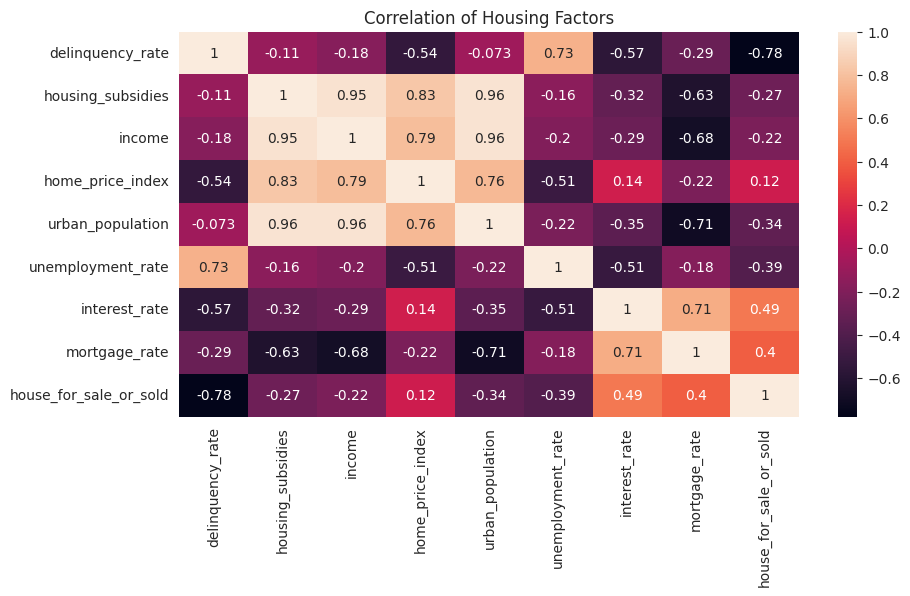

In [ ]:
others_factors = ['delinquency_rate', 'housing_subsidies','income','home_price_index','urban_population', 'unemployment_rate', 'interest_rate', 'mortgage_rate', 'house_for_sale_or_sold']

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
sns.heatmap(df[others_factors].corr(), annot=True)
plt.title('Correlation of Housing Factors')
plt.show()

# Correlation of Housing Factors
Previously we made a correlation between the factors that we thought could affect Price and selling of houses in which we found that there was only a significant positive correlation between income and the price of houses. what it took me to do a broader correlation of all the other factors that could affect

In this correlation map we can see in a broader and safer way what could be the factors that affect the Price and selling houses based on their positive correlation.

We can observe a significant correlation between the price of houses and income and again in price and population and a greater correlation between price of houses, housing subsidies and income.

Regarding the buying and selling of a home, it has a medium positive correlation with the mortgage rate and interest rate but at the same time a significant negative correlation with the delinquency rate.

# Chart to show how the price and buying and selling of houses has increased over the years.

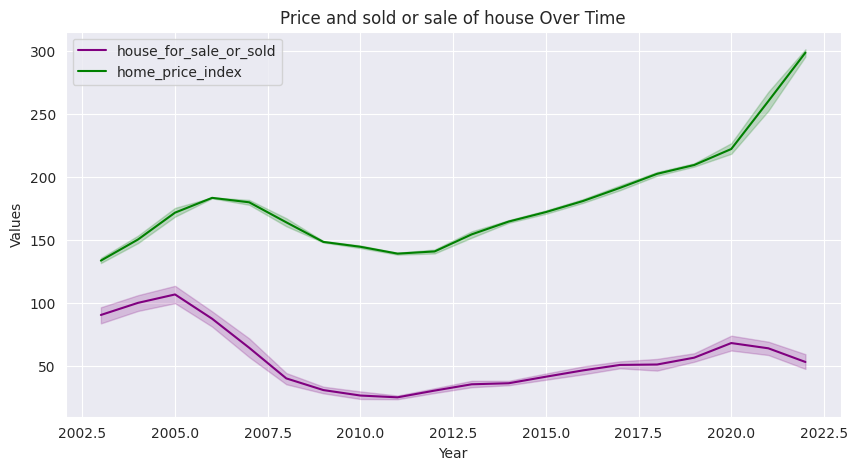

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='house_for_sale_or_sold', data=df, color='purple', label='house_for_sale_or_sold')
sns.lineplot(x='Year', y='home_price_index', data=df, color='green', label='home_price_index')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Price and sold or sale of house Over Time')
plt.legend()
plt.show()

# **Conclusion**
We can conclude based on the results of the analysis that the factors mentioned above that could be the ones that affect the increase price, buying and selling houses are not as influential as I initially thought.

For **price** of houses, the most important factor that increases the value of properties would be;

*   Income
*   Population

* Houses subsidence

 These have a positive correlation with the price of houses which means that their values ​​cause the price of houses to increase.


Regarding the **purchase and sale** of a house, only a medium correlation was found between:



*  Mortgage rate
*  Iterest rate


*   Delinquency rate (**negative correlation**)

The factors that most affect the price and sales of houses are different factors. Consequently, there is no apparent relationship between the price of houses and the purchase and sale.






